In [1]:
import os
import pandas as pd
import numpy as np
import random
from pandas import DataFrame
from datetime import datetime
from sklearn.linear_model import Ridge
import matplotlib
from matplotlib import pyplot as plt


# input file path
workdir = "D://DrugResponsivenessGuideline_log//Github//200914_reupload//Dataset//Scenario3_EYDC-9K"

In [2]:
# read input file and index file for training and test set
dataset = np.load(workdir + "//200914_EYDC9K.npz")
ss0 = np.load(workdir + '//200914_EYDC9K_r0_9_1.npz')

In [3]:
# input and index file assign
x = dataset['x']
y = dataset['y']
# y_linear = dataset['y_lnIC50']
ss0_train = ss0['train']
ss0_test = ss0['test']

In [4]:
# training and test dataset assign
training_image_array, training_label_array = x[ss0_train], y[ss0_train]
test_image_array, test_label_array = x[ss0_test], y[ss0_test]


In [5]:
# checking the size of dataset
x.shape

(9590, 41505)

In [6]:
# checking the size of training set
training_image_array.shape

(8631, 41505)

In [7]:
train_X, train_y, test_X, test_y = training_image_array, training_label_array, test_image_array, test_label_array


In [8]:
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(8631, 41505) (8631,) (959, 41505) (959,)


In [9]:
# impute nan to zero
train_X = np.nan_to_num(train_X)
test_X = np.nan_to_num(test_X)

In [10]:
# data typing and the number of dataset
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
# train_X /= 255
# test_X /= 255
print('train_X shape:', train_X.shape)
print(train_X.shape[0], 'train samples')
print(test_X.shape[0], 'test samples')

train_X shape: (8631, 41505)
8631 train samples
959 test samples


In [11]:
# model fitting
StartTime8 = datetime.now()
print("StartTime :", StartTime8)

ridge_regressor = Ridge(alpha=0.001)

ridge_regressor.fit(train_X,train_y)

EndTime8 = datetime.now()
print("EndTime :", EndTime8)

StartTime : 2020-09-15 12:15:25.235404


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\sklearn\linear_model\_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "


EndTime : 2020-09-15 12:17:12.893809


In [12]:
predicted_classes = ridge_regressor.predict(test_X)

In [13]:
predicted_value = predicted_classes

In [14]:
# saving predicted ln(IC50)s and ln(IC50)s in the test set
a = pd.DataFrame(predicted_value)
b = pd.DataFrame(test_label_array)
c = pd.concat([a,b], axis=1)
c.columns=["Predicted","Test"]
workdir = "D://DrugResponsivenessGuideline_log//Github//200914_reupload//Result//EYDC-9K"
c.to_csv(workdir + '//200915_EYDC9K_Ridge_pred_and_val_result.csv', index=False)


In [15]:
# result table
c.head()

,Predicted,Test
0,-3.578825,-4.667942
1,1.988497,2.079442
2,1.678770,2.079442
3,2.359377,2.079442
4,1.930988,2.079442


In [16]:
# the length of result table
predicted_value.shape

(959,)

In [18]:
# model save
import pickle
from sklearn.externals import joblib
joblib.dump(ridge_regressor, workdir + '//200915_EYDC9K_Ridge_model.pkl') 


['D://DrugResponsivenessGuideline_log//Github//200914_reupload//Result//EYDC-9K//200915_EYDC9K_Ridge_model.pkl']

In [19]:
# check whether the saved model is working
regr_from_joblib = joblib.load(workdir + '//200915_EYDC9K_Ridge_model.pkl') 
regr_from_joblib.predict(test_X)

array([-3.5788245 ,  1.988497  ,  1.6787697 ,  2.3593774 ,  1.930988  ,
       -2.734221  ,  0.5728318 ,  0.71850705, -2.5875895 ,  1.7602262 ,
       -0.11001611, -1.1336788 ,  2.3164945 ,  2.2434974 ,  1.5171669 ,
        1.8050702 , -1.3499198 , -1.6148081 ,  1.7990494 ,  2.1362522 ,
        0.97350043,  1.6407001 , -2.0666842 , -1.8875654 ,  0.99747294,
        1.0162846 ,  1.5720553 ,  1.9896865 ,  1.0327263 ,  1.4573003 ,
       -1.424115  ,  0.2932868 , -1.5106778 ,  1.473439  ,  0.9432827 ,
        2.6093802 ,  1.6542436 , -0.20642066,  1.28182   ,  2.422688  ,
        1.2626431 ,  2.701983  ,  0.5707035 ,  1.3033772 ,  1.4236017 ,
        1.1973555 ,  2.3866773 ,  0.5232736 ,  2.83404   ,  1.9547305 ,
       -1.818582  ,  2.2577686 ,  1.7974144 ,  1.7744989 ,  1.7325313 ,
        0.66687375,  1.6312165 ,  1.161228  ,  1.921214  ,  1.9156151 ,
        2.2137969 , -0.56791496,  0.82966274,  0.84837145, -0.8770492 ,
        1.4102597 , -1.7711394 ,  0.06193566, -4.406835  ,  2.51

In [20]:
import matplotlib
from matplotlib import pyplot as plt

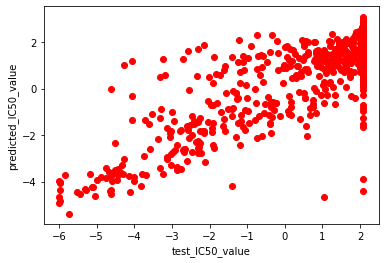

In [21]:
# plotting
plt.scatter(test_label_array,predicted_value,c='red')
plt.xlabel('test_IC50_value')
plt.ylabel('predicted_IC50_value')
plt.savefig(workdir + '//200915_EYDC9K_Ridge_plot.png')

In [22]:
from sklearn.metrics import r2_score
r2_value = r2_score(b,a)
print(r2_value)

0.7144023785081708


In [23]:
from scipy.stats import linregress
linregress(b[0], a[0])

LinregressResult(slope=0.7325711686034957, intercept=0.20914763440290374, rvalue=0.8456462271129407, pvalue=3.479712114116117e-263, stderr=0.01494644788762455)

In [24]:
rse = ((b[0]-a[0])**2).sum()
mse = rse / len(b)
print("Final rmse value is =",np.sqrt(mse))

Final rmse value is = 1.054502558081143
